In [1]:
# nạp thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# đọc dữ liệu
df = pd.read_csv('../data/HR_comma_sep.csv')

In [3]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 150

In [4]:
# kiểm tra giá trị null
print(df.isna().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [5]:
# mô tả các giá trị mean min max std
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [6]:
# mã hoá dữ liệu
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [7]:
# tiến hành thiết lập dữ liệu bằng cách tạo ra các phần tử chứa chuỗi 'salary'
# sau đó chuyển đổi dữ liệu phân loại thành các biến chỉ số
Elements = ['salary']
final_data = pd.get_dummies(df, columns=Elements, drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   satisfaction_level     14999 non-null  int64
 1   last_evaluation        14999 non-null  int64
 2   number_project         14999 non-null  int64
 3   average_montly_hours   14999 non-null  int64
 4   time_spend_company     14999 non-null  int64
 5   Work_accident          14999 non-null  int64
 6   left                   14999 non-null  int64
 7   promotion_last_5years  14999 non-null  int64
 8   sales                  14999 non-null  int32
 9   salary_1               14999 non-null  uint8
 10  salary_2               14999 non-null  uint8
dtypes: int32(1), int64(8), uint8(2)
memory usage: 1.0 MB


In [8]:
# chia tập dữ liệu train test
from sklearn.model_selection import train_test_split
X = final_data.drop('left', axis=1)
y = final_data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=6)

In [9]:
# tạo mô hình cây quyết định
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_test, y_test)

DecisionTreeClassifier()

In [10]:
# dự đoán khả năng rời công ty (left = 1 là rời đi)
predictions = dtree.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,predictions))
# tạo ma trận nhầm lẫn bằng cách lập bảng chéo rownames
pd.crosstab(y_train, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11192
           1       0.88      0.93      0.90      3507

    accuracy                           0.95     14699
   macro avg       0.93      0.94      0.94     14699
weighted avg       0.95      0.95      0.95     14699



Predicted,0,1,All
True,,,
0,10734,458,11192
1,247,3260,3507
All,10981,3718,14699


In [11]:
# trực quan hoá
from sklearn import tree
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_0 <= 37.50
|   |--- feature_0 <= 4.50
|   |   |--- class: 1
|   |--- feature_0 >  4.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_3 <= 66.00
|   |   |   |   |--- feature_3 <= 29.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  29.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  66.00
|   |   |   |   |--- feature_0 <= 22.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  22.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_2 <= 4.50
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_1 <= 11.50
|   |   |   |   |   |   |--- feature_7 <= 7.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  7.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  11.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |--- feature_0 <= 17.00
|   |   |

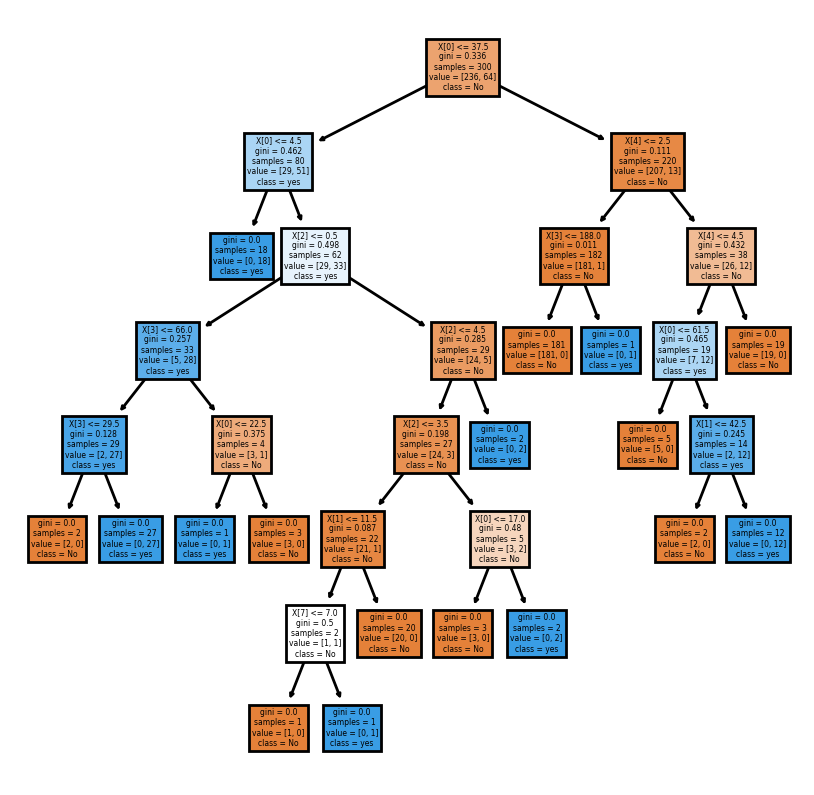

In [12]:
# plot tree
plt.figure(figsize=(5, 5), dpi=200)
t = tree.plot_tree(dtree, class_names=["No", "yes"], filled=True)
plt.show()

In [13]:
# Xây dựng mô hình Random Forest cho classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

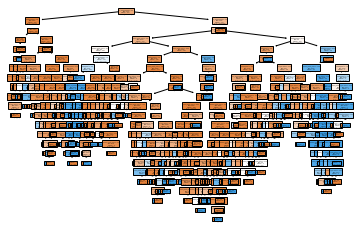

In [14]:
from sklearn import tree
_ = tree.plot_tree(classifier.estimators_[0], feature_names=X_train.columns, filled=True)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[236   0]
 [  2  62]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       236
           1       1.00      0.97      0.98        64

    accuracy                           0.99       300
   macro avg       1.00      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300

0.9933333333333333


In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.006666666666666667
Mean Squared Error: 0.006666666666666667
Root Mean Squared Error: 0.08164965809277261


In [17]:
# Xây dựng mô hình Neural Network
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [18]:
#predict
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

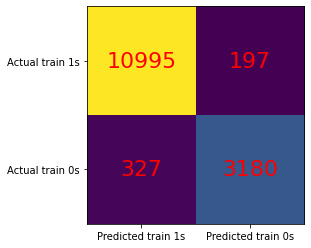

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11192
           1       0.94      0.91      0.92      3507

    accuracy                           0.96     14699
   macro avg       0.96      0.94      0.95     14699
weighted avg       0.96      0.96      0.96     14699



In [19]:
#evaluate model
cm_train=confusion_matrix(y_train,predict_train)
fig,ax=plt.subplots()
ax.imshow(cm_train)
ax.xaxis.set(ticks=(1,0), ticklabels=('Predicted train 0s','Predicted train 1s'))
ax.yaxis.set(ticks=(1,0), ticklabels=('Actual train 0s','Actual train 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm_train[i,j],ha='center',va='center',color='r',fontsize=22)
plt.show()
print(classification_report(y_train,predict_train))

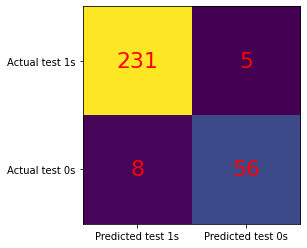

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       236
           1       0.92      0.88      0.90        64

    accuracy                           0.96       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.96      0.96      0.96       300



In [20]:
cm_test=confusion_matrix(y_test,predict_test)
fig,ax=plt.subplots()
ax.imshow(cm_test)
ax.xaxis.set(ticks=(1,0), ticklabels=('Predicted test 0s','Predicted test 1s'))
ax.yaxis.set(ticks=(1,0), ticklabels=('Actual test 0s','Actual test 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm_test[i,j],ha='center',va='center',color='r',fontsize=22)
plt.show()
print(classification_report(y_test,predict_test))

In [21]:
# save model
import pickle
with open('./models/model_DecisionTree', 'wb') as f:
    pickle.dump(dtree, f)
with open('./models/model_RandomForest', 'wb') as c:
    pickle.dump(classifier, c)
with open('./models/model_NeuralNetwork', 'wb') as n:
    pickle.dump(model, n)